In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import numpy as np
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras import backend as K
import keras.callbacks
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
from keras.regularizers import l2, activity_l2
from scipy.interpolate import spline

Using Theano backend.


In [12]:
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:95: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag()

In [2]:
epochs = 50
learning_rate = 0.01
decay_rate = 5e-6
momentum = 0.9
reg=0.0001
look_back = 23

In [3]:
dataframe = pd.read_csv('../data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
##### PERIODO DEFINE MELHOR A PREVISÃO
numpy.random.seed(7)
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

(115, 29)


In [4]:
def my_init(shape, name=None):
    value = np.random.random(shape)
    return K.variable(value, name=name)

def step_decay(losses):
    if float(2*np.sqrt(np.array(history.losses[-1])))<0.15:
        lrate=0.01*1/(1+0.1*len(history.losses))
        momentum=0.2
        decay_rate=0.0
        return lrate
    else:
        lrate=0.01
        return lrate
sd=[]
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = [1,1]

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        sd.append(step_decay(len(self.losses)))
        print('learning rate:', step_decay(len(self.losses)))
        print('derivative of loss:', 2*np.sqrt((self.losses[-1])))

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [5]:
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX.shape
# reshape input to be [samples, time steps, features]
trainY = trainY.reshape(len(trainY), 1)
testY = testY.reshape(len(testY), 1)

In [6]:
model = Sequential()
model.add(Dense(4,input_dim=look_back,init=my_init))
model.add(Dense(1, W_regularizer=l2(reg), activity_regularizer=activity_l2(reg)))
sgd = SGD(lr=learning_rate,momentum=momentum, decay=decay_rate, nesterov=False,)



In [7]:
model.compile(loss='mean_squared_error', optimizer=sgd)

history=LossHistory()
lrate=LearningRateScheduler(step_decay)

In [8]:
model.fit(trainX, trainY, nb_epoch=epochs, batch_size=1, verbose=2,callbacks=[history,lrate])

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict-trainY
sd[0]
c3=range(0,len(sd))

WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Epoch 1/50
('learning rate:', 0.01)
('derivative of loss:', 2.980061186199078)
0s - loss: 2.2202
Epoch 2/50
('learning rate:', 0.01)
('derivative of loss:', 0.22453292059011021)
0s - loss: 0.0126
Epoch 3/50
('learning rate:', 0.01)
('derivative of loss:', 0.17922771593951128)
0s - loss: 0.0080
Epoch 4/50
('learning rate:', 0.0062499999999999995)
('derivative of loss:', 0.13446460553182477)
0s - loss: 0.0045
Epoch 5/50
('learning rate:', 0.0058823529411764705)
('derivative of loss:', 0.11955952810364666)
0s - loss: 0.0036
Epoch 6/50
('learning rate:', 0.005555555555555556)
('derivative of loss:', 0.11440393085061293)
0s - loss: 0.0033
Epoch 7/50
('learning rate:', 0.005263157894736843)
('derivative of loss:', 0.11029018862245764)
0s - loss: 0.0030
Epoch 8/50
('learning rate:', 0.005)
('derivative of loss:', 0.10558712173232933)
0s - loss: 0.0028
Epoch 9/50
('learning rate:', 0.0047619047619047615)
('derivative of loss:', 0.10932417030372353)
0s - loss: 0.0030
Epoch 10/50
('learning rate

/usr/local/lib/python2.7/dist-packages/keras/backend/theano_backend.py:514: UserWarning: theano.function was asked to create a function computing outputs given certain inputs, but the provided input variable at index 1 is not part of the computational graph needed to compute the outputs: keras_learning_phase.
To make this warning into an error, you can pass the parameter on_unused_input='raise' to theano.function. To disable it completely, use on_unused_input='ignore'.
  **kwargs)


In [9]:
threshold=1.2
error0=np.mean(abs(trainPredict-trainY))
error=error0+error0*threshold
est_min=np.reshape([trainPredict[i]-error for i in range(0,len(trainPredict))],(92,))
est_max=np.reshape([trainPredict[i]+error for i in range(0,len(trainPredict))],(92,))

In [10]:
x = np.arange(0, len(trainPredict), 1)
color0='lawngreen'

/usr/local/lib/python2.7/dist-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/usr/local/lib/python2.7/dist-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):
/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


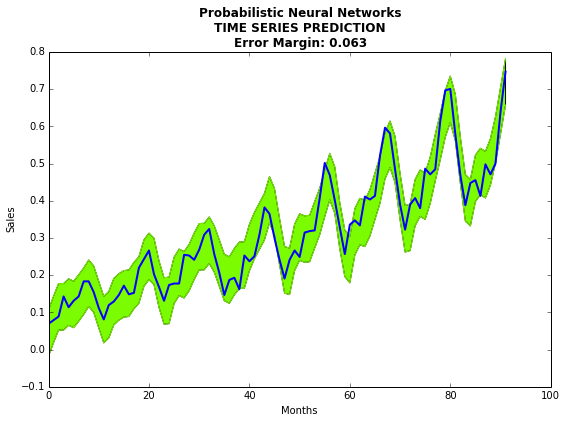

In [13]:
plt.figure(figsize=(9,6))
plt.plot(est_min,color=color0,linewidth=1)
plt.plot(est_max,color=color0,linewidth=1)
plt.fill_between(x,est_min,est_max,facecolor=color0)
plt.plot(trainY,linewidth=2,color='b',label='TIME SERIES')
plt.title("Probabilistic Neural Networks\n"+"TIME SERIES PREDICTION\n"+'Error Margin: {}'.format(round(error,3)),fontweight='bold')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

In [14]:
print('Accuracy Train:',1-np.mean(abs(trainPredict-trainY)))
print('Accuracy Test:',1-np.mean(abs(testPredict-testY)))

('Accuracy Train:', 0.9715895915161008)
('Accuracy Test:', 0.95165408651034034)
